In [15]:
from google.colab import files
uploaded = files.upload()

Saving blurred7.jpg to blurred7.jpg


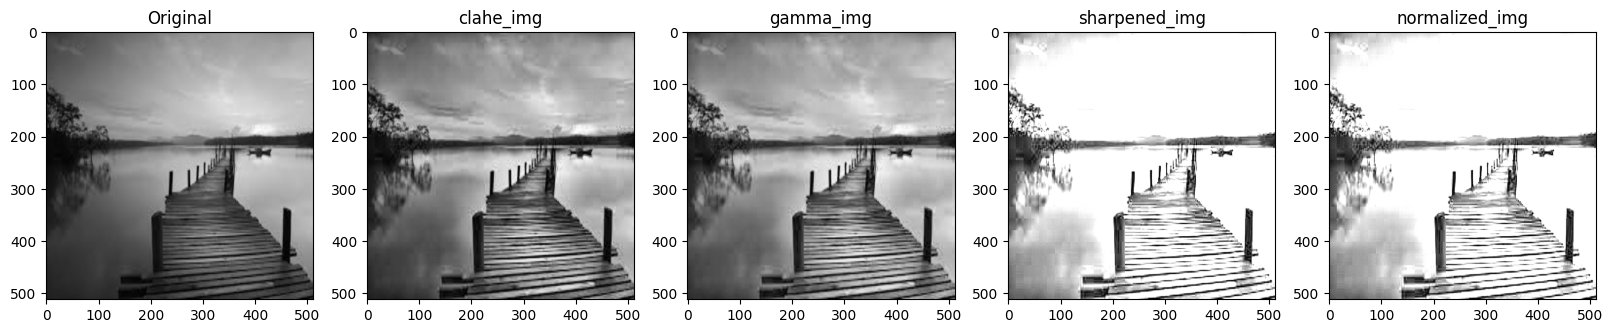

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and resize image
image_path = 'images.jpeg'  # replace with your filename
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (512, 512))

# Step 2: Apply CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(img)

# Step 3: Apply Gamma Correction
gamma = 1.2
invGamma = 1.0 / gamma
table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(256)]).astype("uint8")
gamma_img = cv2.LUT(clahe_img, table)

# Step 4: Apply Sharpening
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 6, -1],
                           [0, -1, 0]])
sharpened_img = cv2.filter2D(gamma_img, -1, kernel_sharpen)

# Step 5: Normalize
normalized_img = sharpened_img.astype('float32') / 255.0


# step 6 : Output

plt.figure(figsize=(20, 15))

plt.subplot(1, 5, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')

plt.subplot(1, 5, 2)
plt.imshow(clahe_img, cmap='gray')
plt.title('clahe_img')

plt.subplot(1, 5, 3)
plt.imshow(gamma_img, cmap='gray')
plt.title('gamma_img')

plt.subplot(1, 5, 4)
plt.imshow(sharpened_img, cmap='gray')
plt.title('sharpened_img')

plt.subplot(1, 5, 5)
plt.imshow(normalized_img, cmap='gray')
plt.title('normalized_img')

plt.show()
